In [27]:
!pip install pyarrow

     ---------------------------------------- 21.5/21.5 MB 2.9 MB/s eta 0:00:00


In [46]:
!pip install matplotlib

In [19]:
!pip3 install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 4.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import pickle
import random

In [39]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
def save_pickle(file_name, file_path):
    with open(file_path, 'wb') as fp:
        pickle.dump(file_name, fp)

In [5]:
def read_pickle(file_path):
    with open(file_path, 'rb') as fp:
        file_name = pickle.load(fp)
    return file_name

In [6]:
save_location = './procedures_aggregation_2019.pkl'

In [7]:
DHC_2020 = pd.read_pickle(save_location)

In [7]:
save_location = './indigo_speciality_to_nucc_crosswalk.pkl'

In [8]:
crosswalk = pd.read_pickle(save_location)

In [9]:
crosswalk

,NUCC Display Name,NUCC Classification,NUCC Code,Indigo Specialty,OLD Indigo Class Specialty
0,Sports Medicine (Internal Medicine) Physician,Internal Medicine,207RS0010X,Internal Medicine-No Surgery,Internal Medicine - Non-Surgical
1,Pediatric Dentist,Dentist,1223P0221X,NaN,NaN
2,Optometrist,Optometrist,152W00000X,Optometrist,NaN
3,Pediatric Rehabilitation Medicine Physician,Physical Medicine & Rehabilitation,2081P0010X,Physiatry,Physiatry - Non-Surgical
4,Radiology Podiatrist,Podiatrist,213ER0200X,Podiatrist,Podiatry
...,...,...,...,...,...
340,Addiction Medicine (Psychiatry & Neurology) Ph...,Psychiatry & Neurology,2084A0401X,Psychiatry,Psychiatry - Non-Surgical
341,Otology & Neurotology Physician,Otolaryngology,207YX0901X,Otorhinolaryngology-No Surgery,Otorhinolaryngology - Non-Surgical
342,Clinical & Laboratory Dermatological Immunolog...,Dermatology,207NI0002X,Dermatology-No Surgery,Dermatology - Non-Surgical
343,Pediatric Endocrinology Physician,Pediatrics,2080P0205X,Endocrinology-No Surgery,Endocrinology - Non-Surgical


In [10]:
len(list(set(crosswalk['Indigo Specialty'])))

115

In [47]:
DHC_2020.head()

,npi,FIRST_NAME,LAST_NAME,CLAIM_YEAR,HCPCS_CPT_CODE,HCPCS_CPT_DESCRIPTION,NUMBER_PROCEDURES,NUMBER_UNIQUE_PATIENTS,TOTAL_CHARGES,AVG_CHARGE_PER_PROCEDURE,HCPCS_CPT_CATEGORY,HCPCS_CPT_SUBCATEGORY
0,1003063181,Anita,Nagamine,2019,19000,Drainage of breast lesion,1,1,367.0,367.000000,Surgery,Surgery - Integumentary System
1,1003063181,Anita,Nagamine,2019,76641,ULTRASOUND BREAST COMPLETE,25,24,4428.0,177.120000,Radiology,Radiology - Diagnostic Ultrasound
2,1003063181,Anita,Nagamine,2019,19081,Bx breast 1st lesion strtctc,2,2,2798.0,1399.000000,Surgery,Surgery - Integumentary System
3,1003063181,Anita,Nagamine,2019,76642,ULTRASOUND BREAST LIMITED,27,23,4306.0,159.481481,Radiology,Radiology - Diagnostic Ultrasound
4,1003063181,Anita,Nagamine,2019,19083,Bx breast 1st lesion us imag,4,4,5462.0,1365.500000,Surgery,Surgery - Integumentary System


In [12]:
crosswalk.head()

,NUCC Display Name,NUCC Classification,NUCC Code,Indigo Specialty,OLD Indigo Class Specialty
0,Sports Medicine (Internal Medicine) Physician,Internal Medicine,207RS0010X,Internal Medicine-No Surgery,Internal Medicine - Non-Surgical
1,Pediatric Dentist,Dentist,1223P0221X,NaN,NaN
2,Optometrist,Optometrist,152W00000X,Optometrist,NaN
3,Pediatric Rehabilitation Medicine Physician,Physical Medicine & Rehabilitation,2081P0010X,Physiatry,Physiatry - Non-Surgical
4,Radiology Podiatrist,Podiatrist,213ER0200X,Podiatrist,Podiatry


In [50]:
def get_set_column(column_name, DHC_2020):
    list_ = list(set(list(DHC_2020[column_name])))
    print(len(list_))
    print(list_[:10])
    return list_

In [51]:
hcpcs_codes = get_set_column('HCPCS_CPT_CODE', DHC_2020)

17477
['69000', 'M1061', 'Q0144', 'J0697', 'A4428', '27637', '40700', '52353', '64570', '64898']


In [52]:
hcpcs_code_desc = get_set_column('HCPCS_CPT_DESCRIPTION', DHC_2020)

15334
['CYTOGENETIC STUDY', 'Anesth removal of testis', 'THROMBOXANE URINE', 'CPM device, other than knee', 'US LEIOMYOMATA ABLATE <200', 'Disposable compressor filter', 'H-reflex test', 'REPAIR OF TIBIA', 'Methacholine chloride, neb', 'Hydromorphone injection']


In [53]:
hcpcs_code_category = get_set_column('HCPCS_CPT_CATEGORY', DHC_2020)

635
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [54]:
hcpcs_code_subcategory = get_set_column('HCPCS_CPT_SUBCATEGORY', DHC_2020)

723
[nan, 'Pathology and Laboratory', 'Medical Services', 'Medicine - Gastroenterology', 'Path. and Lab. - Proprietary Laboratory Analyses', 'Radiology - Breast Mammography', 'Eval. and Mgmt. - Emergency Department Services', 'Medicine - Home Health Procedures/Services', 'Eval. and Mgmt. - Transitional Care Management Services', 'Anesthesia - Intrathoracic']


In [55]:
hcpcs_subcategory_code_dict = {}
for subcat in hcpcs_code_subcategory:
    hcpcs_subcategory_code_dict[subcat] = []

In [56]:
done = {}
for _, r in DHC_2020.iterrows():
    if r['HCPCS_CPT_CODE'] not in done:
        hcpcs_subcategory_code_dict[r['HCPCS_CPT_SUBCATEGORY']].append(r['HCPCS_CPT_CODE'])
        done[r['HCPCS_CPT_CODE']] = None

In [57]:
grouped_hcpcs_codes = []
for subcat in hcpcs_subcategory_code_dict:
    grouped_hcpcs_codes += hcpcs_subcategory_code_dict[subcat]

In [58]:
len(set(grouped_hcpcs_codes))*2

34954

In [59]:
len(grouped_hcpcs_codes)

17477

In [60]:
grouped_hcpcs_codes[9626]

'80324'

In [61]:
save_pickle(grouped_hcpcs_codes, './grouped_hcpcs_codes2019.pkl')

In [8]:
grouped_hcpcs_codes = pd.read_pickle('./grouped_hcpcs_codes2019.pkl')

In [9]:
code_pos_dict = {}
i=0
for code in grouped_hcpcs_codes:
    code_pos_dict[code] = i
    i+=1

In [10]:
npi_hcpcs_dict = {}
for _, r in DHC_2020.iterrows():
    if r['npi'] not in npi_hcpcs_dict:
        npi_hcpcs_dict[r['npi']] = len(grouped_hcpcs_codes)*[0]
    npi_hcpcs_dict[r['npi']][code_pos_dict[r['HCPCS_CPT_CODE']]] += r['NUMBER_PROCEDURES']

In [11]:
save_pickle(npi_hcpcs_dict, './npi_hcpcs_distribution_dict_2019.pkl')

In [ ]:
npi_hcpcs_dict_normalized = {}
for NPI in npi_hcpcs_dict:
    npi_hcpcs_dict_normalized[NPI] = np.array(npi_hcpcs_dict[NPI])/sum(npi_hcpcs_dict[NPI])

In [ ]:
len(npi_hcpcs_dict)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
save_pickle(npi_hcpcs_dict_normalized, './npi_hcpcs_normalized_distribution_dict_2019.pkl')

In [ ]:
# Analysis for later
hcpcs_subcategory_code_dict_2 = {}
for subcat in hcpcs_code_subcategory:
    hcpcs_subcategory_code_dict_2[subcat] = []
for _, r in DHC_2020.iterrows():
    hcpcs_subcategory_code_dict_2[r['HCPCS_CPT_SUBCATEGORY']].append(r['HCPCS_CPT_CODE'])

In [2]:
npi_distribution_data_path = './npi_hcpcs_distribution_dict.pkl'
npi_distribution = pd.read_pickle(npi_distribution_data_path)

In [12]:
all_npis = list(npi_hcpcs_dict)

In [13]:
len(all_npis)

1599784

In [14]:
npi_lis = [[] for _ in range(10)]
for i in range(len(all_npis)):
    cur_rand_int = random.randint(0, 9)
    npi_lis[cur_rand_int].append(all_npis[i])

In [15]:
for i in range(10):
    print(len(npi_lis[i]))

160057
159142
160489
160814
160410
160050
159369
160111
158942
160400


In [ ]:
for i in range(len(npi_lis)):
    temp_data_dict = {}
    file_path = './chuncked_npi_ncpcs_2019_' + str(i) + '_.pkl'
    for npi in npi_lis[i]:
        temp_data_dict[npi] = npi_hcpcs_dict[npi]
    save_pickle(temp_data_dict, file_path)
    temp_data_dict = None

In [32]:
'./chuncked_npi_ncpcs_' + str(1) + '_.pkl'

'./chuncked_npi_ncpcs_1_.pkl'

In [39]:
all_distribution = []
for npi in all_npis:
    all_distribution.append(npi_distribution[npi])

In [44]:
len(all_distribution)

1676338

70

In [5]:
chunked_npi_ncpcs_0 = pd.read_pickle('./chuncked_npi_ncpcs_0_.pkl')

In [6]:
list(chunked_npi_ncpcs_0)[:10]

['1003921909',
 '1013242205',
 '1023068467',
 '1023088978',
 '1023211547',
 '1023461308',
 '1033539010',
 '1043441884',
 '1043566946',
 '1043656390']

In [18]:
temp_df = pd.DataFrame({'1003921909':chunked_npi_ncpcs_0['1003921909'], '1013242205':chunked_npi_ncpcs_0['1013242205']})

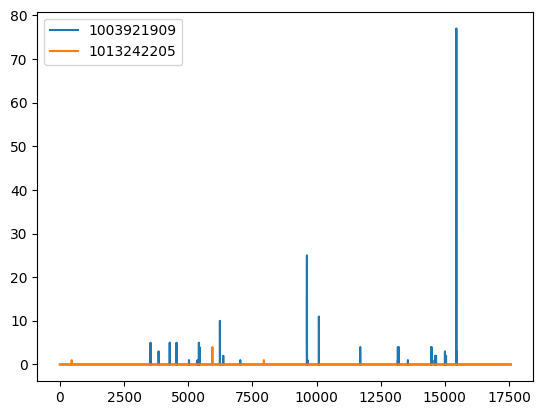

In [19]:
temp_df.plot()
plt.show()

In [24]:
def normalize_counts(data_dict):
    new_data_dict = {}
    for key in data_dict:
        if sum(data_dict[key]) > 100:
            new_data_dict[key] = np.array(data_dict[key])/sum(data_dict[key])
    return new_data_dict

In [25]:
normalized_chunked_npi_ncpcs_0 = normalize_counts(chunked_npi_ncpcs_0)

In [22]:
temp_df = pd.DataFrame({'1003921909':normalized_chunked_npi_ncpcs_0['1003921909'], '1013242205':normalized_chunked_npi_ncpcs_0['1013242205']})

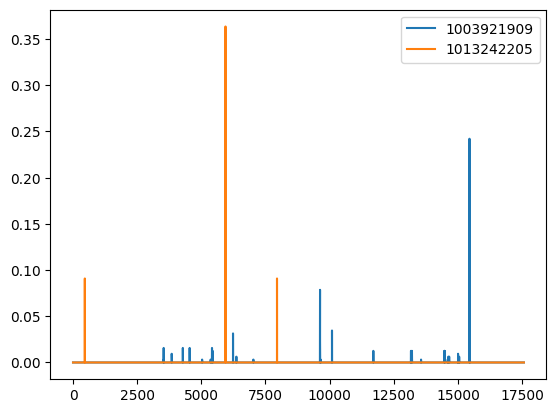

In [23]:
temp_df.plot()
plt.show()

In [30]:
npi_reference = pd.read_csv('./npidata_pfile_20050523-20230709.csv')

C:\Users\ganga\AppData\Local\Temp\ipykernel_30300\3365058171.py:1: DtypeWarning: Columns (17,24,26,32,34,39,40,46,56,60,61,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,110,111,113,114,115,117,118,119,121,122,123,125,126,127,129,130,131,133,134,135,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,169,170,171,173,174,175,177,178,179,181,182,183,185,186,187,189,190,191,193,194,195,197,198,199,201,202,203,205,206,207,209,210,211,213,214,215,217,218,219,221,222,223,225,226,227,229,230,231,233,234,235,237,238,239,241,242,243,245,246,247,249,250,251,253,254,255,257,258,259,261,262,263,265,266,267,269,270,271,273,274,275,277,278,279,281,282,283,285,286,287,289,290,291,293,294,295,297,298,299,301,302,303,305,306,312,317,318,319,320,321,322,323,324,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  npi_reference = pd.read

In [54]:
npi_reference['Healthcare Provider Taxonomy Group_4']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
7890761    NaN
7890762    NaN
7890763    NaN
7890764    NaN
7890765    NaN
Name: Healthcare Provider Taxonomy Group_4, Length: 7890766, dtype: object

In [34]:
list(npi_reference.columns)

['NPI',
 'Entity Type Code',
 'Replacement NPI',
 'Employer Identification Number (EIN)',
 'Provider Organization Name (Legal Business Name)',
 'Provider Last Name (Legal Name)',
 'Provider First Name',
 'Provider Middle Name',
 'Provider Name Prefix Text',
 'Provider Name Suffix Text',
 'Provider Credential Text',
 'Provider Other Organization Name',
 'Provider Other Organization Name Type Code',
 'Provider Other Last Name',
 'Provider Other First Name',
 'Provider Other Middle Name',
 'Provider Other Name Prefix Text',
 'Provider Other Name Suffix Text',
 'Provider Other Credential Text',
 'Provider Other Last Name Type Code',
 'Provider First Line Business Mailing Address',
 'Provider Second Line Business Mailing Address',
 'Provider Business Mailing Address City Name',
 'Provider Business Mailing Address State Name',
 'Provider Business Mailing Address Postal Code',
 'Provider Business Mailing Address Country Code (If outside U.S.)',
 'Provider Business Mailing Address Telephone Nu

In [68]:
#npi_taxonomy_switch = {}
#npi_taxonomy_group = {}
npi_taxonomy_code = {}
#switch = 'Healthcare Provider Primary Taxonomy Switch_'
#taxonomy_group = 'Healthcare Provider Taxonomy Group_'
taxonomy_code = 'Healthcare Provider Taxonomy Code_'
i = 0

for _, r in npi_reference.iterrows():
    if i%100000 == 0:
        print('Done: ' + str(i))
    #npi_taxonomy_switch[r['NPI']] = []
    #npi_taxonomy_group[r['NPI']] = []
    npi_taxonomy_code[r['NPI']] = []
    #for i in range(15):
        #if r[switch + str(i+1)] is not None and not pd.isna(r[switch + str(i+1)]):
        #    npi_taxonomy_switch[r['NPI']].append(r[switch + str(i+1)])
        #if r[taxonomy_group + str(i+1)] is not None and not pd.isna(r[taxonomy_group + str(i+1)]):
        #    npi_taxonomy_group[r['NPI']].append(r[taxonomy_group + str(i+1)])
        #    if r[taxonomy_code + str(i+1)] is not None and not pd.isna(r[taxonomy_code + str(i+1)]):
    npi_taxonomy_code[r['NPI']].append(r[taxonomy_code + str(4)])
    npi_taxonomy_code[r['NPI']].append(r[taxonomy_code + str(5)])
    npi_taxonomy_code[r['NPI']].append(r[taxonomy_code + str(6)])
    npi_taxonomy_code[r['NPI']].append(r[taxonomy_code + str(7)])
    npi_taxonomy_code[r['NPI']].append(r[taxonomy_code + str(8)])
    i+=1

Done: 0
Done: 100000
Done: 200000
Done: 300000
Done: 400000
Done: 500000
Done: 600000
Done: 700000
Done: 800000
Done: 900000
Done: 1000000
Done: 1100000
Done: 1200000
Done: 1300000
Done: 1400000
Done: 1500000
Done: 1600000
Done: 1700000
Done: 1800000
Done: 1900000
Done: 2000000
Done: 2100000
Done: 2200000
Done: 2300000
Done: 2400000
Done: 2500000
Done: 2600000
Done: 2700000
Done: 2800000
Done: 2900000
Done: 3000000
Done: 3100000
Done: 3200000
Done: 3300000
Done: 3400000
Done: 3500000
Done: 3600000
Done: 3700000
Done: 3800000
Done: 3900000
Done: 4000000
Done: 4100000
Done: 4200000
Done: 4300000
Done: 4400000
Done: 4500000
Done: 4600000
Done: 4700000
Done: 4800000
Done: 4900000
Done: 5000000
Done: 5100000
Done: 5200000
Done: 5300000
Done: 5400000
Done: 5500000
Done: 5600000
Done: 5700000
Done: 5800000
Done: 5900000
Done: 6000000
Done: 6100000
Done: 6200000
Done: 6300000
Done: 6400000
Done: 6500000
Done: 6600000
Done: 6700000
Done: 6800000
Done: 6900000
Done: 7000000
Done: 7100000
Done: 7

In [67]:
save_pickle(npi_taxonomy_code, './npi_top4to8_taxonomy_code.pkl')

In [3]:
nucc_indigo = pd.read_pickle('./indigo_speciality_to_nucc_crosswalk.pkl')

In [6]:
nucc_indigo

,NUCC Display Name,NUCC Classification,NUCC Code,Indigo Specialty,OLD Indigo Class Specialty
0,Sports Medicine (Internal Medicine) Physician,Internal Medicine,207RS0010X,Internal Medicine-No Surgery,Internal Medicine - Non-Surgical
1,Pediatric Dentist,Dentist,1223P0221X,NaN,NaN
2,Optometrist,Optometrist,152W00000X,Optometrist,NaN
3,Pediatric Rehabilitation Medicine Physician,Physical Medicine & Rehabilitation,2081P0010X,Physiatry,Physiatry - Non-Surgical
4,Radiology Podiatrist,Podiatrist,213ER0200X,Podiatrist,Podiatry
...,...,...,...,...,...
340,Addiction Medicine (Psychiatry & Neurology) Ph...,Psychiatry & Neurology,2084A0401X,Psychiatry,Psychiatry - Non-Surgical
341,Otology & Neurotology Physician,Otolaryngology,207YX0901X,Otorhinolaryngology-No Surgery,Otorhinolaryngology - Non-Surgical
342,Clinical & Laboratory Dermatological Immunolog...,Dermatology,207NI0002X,Dermatology-No Surgery,Dermatology - Non-Surgical
343,Pediatric Endocrinology Physician,Pediatrics,2080P0205X,Endocrinology-No Surgery,Endocrinology - Non-Surgical


In [8]:
all_nucc = list(set(list(nucc_indigo['NUCC Code'])))
len(all_nucc)

345

In [9]:
all_nucc_classification = list(set(list(nucc_indigo['NUCC Classification'])))
len(all_nucc_classification)

90

In [10]:
all_indigo_speciality = list(set(list(nucc_indigo['Indigo Specialty'])))
len(all_indigo_speciality)

115

In [3]:
import pandas as pd
test = pd.read_pickle("./concerned_specialities_npi_features9.pkl")
print(len(test))

38391
